In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('../../datasets/Intro_to_Deep_Learning/dl_course_dataset/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat)
)

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)
X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescale to 0-1
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


Minimum Validation Loss:0.1931


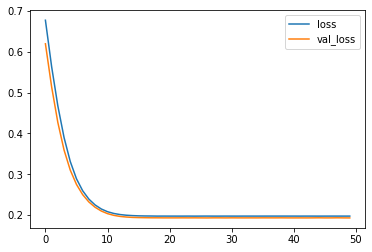

In [4]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss:{:0.4f}".format(history_df['val_loss'].min()))

Minimum Validation Loss: 0.1931


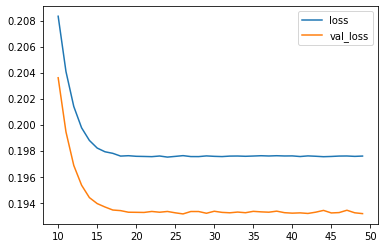

In [5]:
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))


Epoch 1/50
49/49 [==============================] - 0s 3ms/step - loss: 0.2524 - val_loss: 0.2050
Epoch 2/50
49/49 [==============================] - 0s 1ms/step - loss: 0.2023 - val_loss: 0.1985
Epoch 3/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1974 - val_loss: 0.1945
Epoch 4/50
49/49 [==============================] - 0s 2ms/step - loss: 0.1944 - val_loss: 0.1936
Epoch 5/50
49/49 [==============================] - 0s 1ms/step - loss: 0.1920 - val_loss: 0.1928
Epoch 6/50
49/49 [==============================] - 0s 1ms/step - loss: 0.1900 - val_loss: 0.1920

<AxesSubplot:>

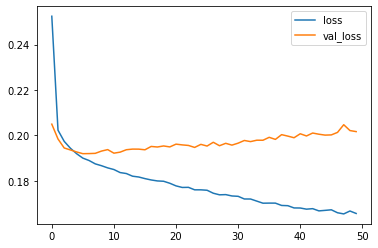

In [6]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae'
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()

In [7]:
print("Minimum Validation Loss:{:0.4f}".format(history_df['val_loss'].min()))

Minimum Validation Loss:0.1920


In [8]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True
)

Epoch 1/50
49/49 [==============================] - 0s 3ms/step - loss: 0.2353 - val_loss: 0.2058
Epoch 2/50
49/49 [==============================] - 0s 2ms/step - loss: 0.2010 - val_loss: 0.1986
Epoch 3/50
49/49 [==============================] - 0s 1ms/step - loss: 0.1963 - val_loss: 0.1957
Epoch 4/50
49/49 [==============================] - 0s 1ms/step - loss: 0.1942 - val_loss: 0.1965
Epoch 5/50
49/49 [==============================] - 0s 1ms/step - loss: 0.1919 - val_loss: 0.1950
Epoch 6/50
49/49 [==============================] - 0s 1ms/step - loss: 0.1905 - val_loss: 0.1946
Epoch 7/50
49/49 [============================

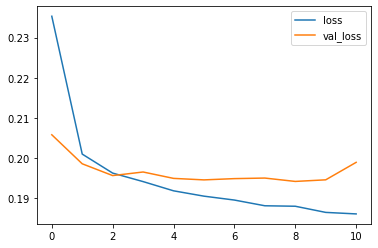

In [10]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer='adam',
    loss='mae'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss:{:0.4f}".format(history_df['val_loss'].min()))